In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Principal Component Analysis Assignment

In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Progress bar for long running for loop
from tqdm.notebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

### Keep only the numeric columns (exluding ID fields) and the pitch type.

Also, drop any remaining records that contain null values.

In [3]:
df = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv"
)
df_og = df.copy()

drop_cols = ["batterId", "pitcherId", "catcherId", "umpireId"]

df = df.select_dtypes("number")
df = df.drop(columns=drop_cols)
df = df.dropna()

df_cols = df.columns
df_index = df.index

df_og = df_og.loc[df.index, :]

df.head(3)

,inning,balls,strikes,outs,timesFaced,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance
2,1,0,2,0,1,0.968,96.5,2127.17,198.816,0.389,2.266,-5.22,9.79,27.78,323.03
5,1,0,2,1,1,0.321,98.3,2038.06,206.732,-0.206,1.430,-8.30,7.96,-15.32,121.39
8,1,1,1,2,1,0.944,96.3,1909.36,203.540,-0.280,1.990,-6.03,7.98,-34.27,97.07


<IPython.core.display.Javascript object>

In [4]:
X = df.copy()
y = df_og["pitchType"]

<IPython.core.display.Javascript object>

### Reduce the dimensionality of the data using PCA to two components.

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns, index=df.index)

<IPython.core.display.Javascript object>

In [6]:
pca = PCA(2)
pca.fit(X)

PCA(n_components=2)

<IPython.core.display.Javascript object>

### Compute the explained variance for new data set.

In [7]:
pca.explained_variance_ratio_
print(f"Total variance explained: {sum(pca.explained_variance_ratio_) * 100:.2f}%")

Total variance explained: 26.74%


<IPython.core.display.Javascript object>

### Generate a scatter plot that visualizes how the component values are distributed.

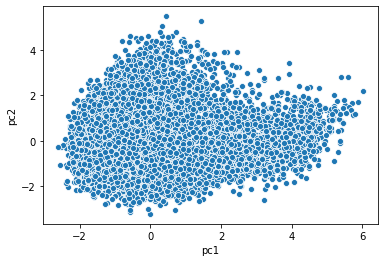

<IPython.core.display.Javascript object>

In [8]:
pc_df = pca.transform(X)
pc_df = pd.DataFrame(pc_df, columns=["pc1", "pc2"], index=df.index)

sns.scatterplot(x="pc1", y="pc2", data=pc_df)
plt.show()

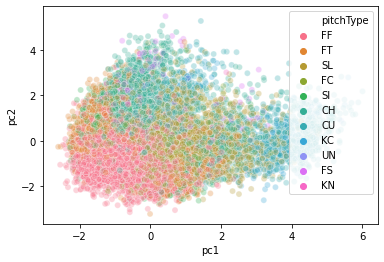

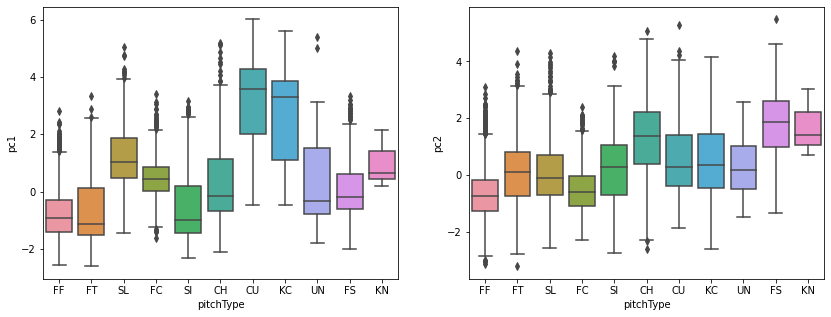

<IPython.core.display.Javascript object>

In [9]:
plot_df = pc_df.copy()
plot_df["pitchType"] = y

sns.scatterplot(x="pc1", y="pc2", hue="pitchType", alpha=0.3, data=plot_df)
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x="pitchType", y="pc1", data=plot_df, ax=axes[0])
sns.boxplot(x="pitchType", y="pc2", data=plot_df, ax=axes[1])
plt.show()

### Create a line plot that shows the explained variance by number of components.

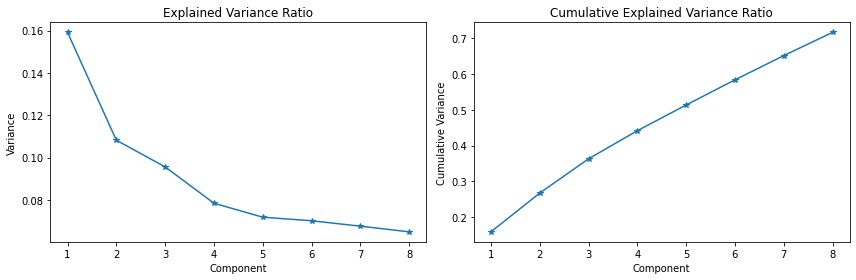

<IPython.core.display.Javascript object>

In [10]:
# Creating more than 2 points for the plot
pca_8 = PCA(8).fit(X)

expl_var = pca_8.explained_variance_ratio_
cumulative_var = np.cumsum(expl_var)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(np.arange(1, 9), expl_var, "-*")
axes[0].set_title("Explained Variance Ratio")
axes[0].set_xlabel("Component")
axes[0].set_ylabel("Variance")

axes[1].plot(np.arange(1, 9), cumulative_var, "-*")
axes[1].set_title("Cumulative Explained Variance Ratio")
axes[1].set_xlabel("Component")
axes[1].set_ylabel("Cumulative Variance")

plt.tight_layout()
plt.show()

### Iteratively train and score a Random Forest Classifier, storing the number of components and accompanying model scores in a list.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [12]:
model = RandomForestClassifier(max_depth=4, random_state=42)

<IPython.core.display.Javascript object>

In [13]:
train_scores = []
test_scores = []

n_cols = df.shape[1]
pc_numbers = np.arange(2, n_cols + 1)

# tqdm is just for a progress bar, it does
# nothing to change the code running
for i in tqdm(pc_numbers):
    pca = PCA(n_components=i)
    pca.fit(X_train)

    pc_X_train = pca.transform(X_train)
    pc_X_test = pca.transform(X_test)

    model.fit(pc_X_train, y_train)
    train_score = model.score(pc_X_train, y_train)
    test_score = model.score(pc_X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

<IPython.core.display.Javascript object>

### Create a line plot that shows the training scores across the different numbers of principal components.

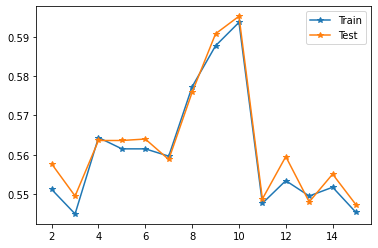

<IPython.core.display.Javascript object>

In [14]:
plt.plot(pc_numbers, train_scores, "-*", label="Train")
plt.plot(pc_numbers, test_scores, "-*", label="Test")
plt.legend()
plt.show()

### Based on the analysis you conducted, what is the optimal number of principal components?

In [15]:
# 10, but should probably crossvalidate to prove

<IPython.core.display.Javascript object>